<a href="https://colab.research.google.com/github/amitmldlai/Impact-on-Linear-Models-under-different-conditions/blob/main/Feature_Importance_with_Variance_in_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What if our features are with different variance 

<pre>
* <b>As part of this task we will observe how linear models work in case of data having features with different variance</b>
* <b>from the output of the above cells we can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. We will apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

**Imports**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

**Read data**

In [42]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:, 1:]

In [43]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


**Correlation between features**

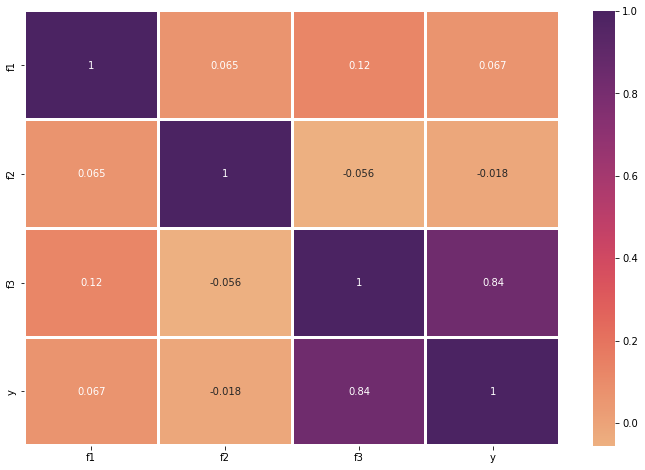

In [68]:
corr = data.corr()
round(corr,2)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='flare', annot=True, linewidths=2)
plt.show()

**Variance in data features**

In [45]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [46]:
X = data[['f1','f2','f3']].values
Y = data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


#Task1:

1. **Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance.**
2. **Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance.**



**Logistic Regression**

In [47]:
logistic_clf = LogisticRegression(penalty='l2')
logistic_clf.fit(X,Y)

LogisticRegression()

Accuracy of Logistic Regression

In [48]:
score = logistic_clf.score(X, Y)
print("Accuracy Logistic Regression ", score)

Accuracy Logistic Regression  0.93


Feature importance

In [49]:
classImportance = logistic_clf.coef_[0]
for id, coef_ in enumerate(classImportance):
  print(f"F{id+1} coefficient =  {abs(classImportance[id])} ")

F1 coefficient =  0.000889638113051081 
F2 coefficient =  1.0416946094804374e-05 
F3 coefficient =  1.9566801565319423 


**SVM classfier**

In [50]:
svmLinear = LinearSVC(penalty='l2', loss='hinge', max_iter=100000, tol=10e-5)
svmLinear.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(loss='hinge', max_iter=100000)

Accuracy of Linear SVM 

In [61]:
score = svmLinear.score(X,Y)
print("Accuracy svm classfier ", score)

Accuracy svm classfier  0.5


Feature importance

In [60]:
svcImportance = svmLinear.coef_[0]
print("Feature importance for SVM:")
for id, coeff_ in enumerate(svcImportance):
  print(f"F{id+1} coefficient = {abs(svcImportance[id])} ")

Feature importance for SVM:
F1 coefficient = 0.0007747251421060052 
F2 coefficient = 0.0002604021844168057 
F3 coefficient = 0.19406868736686486 


***Observation***

1. Logistic regression fits well with good accuracy, variance in data has less impact on LR
2. Linear-SVM  failed to converge with more than 100000 iteration with hinge loss, it has much more impact of variance in data 
3. Feature Importance provided by LR:  F3>F2>F1 and that provided by linear SVM: F3>F1>F2


#Task2:


1. **Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance.**
2. **Apply SVM(SGDClassifier with hinge) on 'data' after standardization i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance.**




Scaling the feature to mean = 0 & variance = 1

In [53]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

Logistic Regression on Standaradized data

In [54]:
logistic_clf_standard = LogisticRegression(penalty='l2')
logistic_clf_standard.fit(X,Y)

LogisticRegression()

Accuracy of Logistic Regression

In [57]:
score_stanrard = logistic_clf_standard.score(X,Y)
print("Accuracy Logistic Regression with standardized feature", score_stanrard)

Accuracy Logistic Regression with standardized feature 0.93


Feature importance

In [56]:
classImportance_standard = logistic_clf_standard.coef_[0]
print("classs importance on standardized data")
for id, coeff_ in enumerate(classImportance_standard):
  print(f"F{id+1} coefficient = {abs(classImportance_standard[id])} ")

classs importance on standardized data
F1 coefficient = 0.24105482944744733 
F2 coefficient = 0.07588844908289781 
F3 coefficient = 3.9035689934763775 


SVM classfier

In [62]:
svmLinear_standard = LinearSVC(penalty='l2', loss='hinge', max_iter=500, tol=10e-5)
svmLinear_standard.fit(X,Y)

LinearSVC(loss='hinge', max_iter=500)

Accuracy of SVM classfier

In [63]:
score_svm_standard = svmLinear_standard.score(X,Y)
print(f"Accuracy of SVM linear classfier on standardized dataset {score_svm_standard}")

Accuracy of SVM linear classfier on standardized dataset 0.925


Feature importance

In [65]:
svcImportance_standard = svmLinear_standard.coef_[0]
print("Feature importance for SVM linear with standardized feature:")
for id, coeff_ in enumerate(svcImportance_standard):
  print(f"F{id+1} coefficient = {abs(svcImportance_standard[id])} ")

Feature importance for SVM linear with standardized feature:
F1 coefficient = 0.21573077183743256 
F2 coefficient = 0.0752043728893808 
F3 coefficient = 2.933675248492721 


***Observation***

1. Logistic regression fits well and with good accuracy on standarized dataset
2. SVM Linear converges super fast after data standardization, accuracy increased to 0.92
3. Feature Importance provided by LR: F3>F1>F2 and that provided by linear SVM: F3>F1>F2 which is stable, thus we can conclude that standarization is necessary for linear models as after standarization the varianace becomes stable across all features and we get stable feature importance